In [21]:
import pandas as pd
import numpy as np
!pip install opencv-contrib-python

In [23]:
import cv2
import os
import matplotlib.pyplot as plt

In [25]:
data = os.listdir(r"C:\Users\yasmi\OneDrive\Desktop\Biometric\SOCOFing\SOCOFing\Real")

In [27]:
type(data)

list

In [29]:
# Using glob to collect all image file paths with .BMP extension from the folder
# It helps to automatically list all matching files without typing them manually


from glob import glob

In [31]:
# This code reads the first 100 fingerprint images from the "Real" folder.
# It stores them in a list for easier and faster processing instead of loading each image manually ( because the folder contains 6000 image )

folder_path = r"C:\Users\yasmi\OneDrive\Desktop\Biometric\SOCOFing\SOCOFing\Real"
image_paths = glob(os.path.join(folder_path, "*.BMP"))
image_paths = image_paths[:100]

In [33]:
images = []

for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)

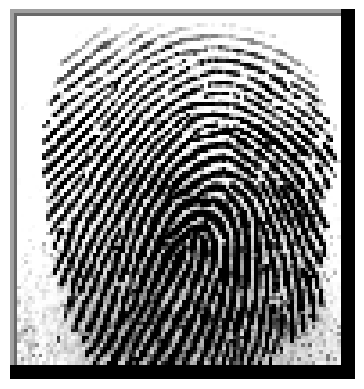

In [35]:
plt.imshow(images[0], cmap='gray')
plt.axis('off')
plt.show()

In [37]:
images = []  

for i, path in enumerate(image_paths[:100]):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)

In [39]:
#Resizing image: 
images_resized = []
for i, path in enumerate(image_paths[:100]):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        # Resize the image
        resized_img = cv2.resize(img, (1050, 1610))
        images_resized.append(resized_img)

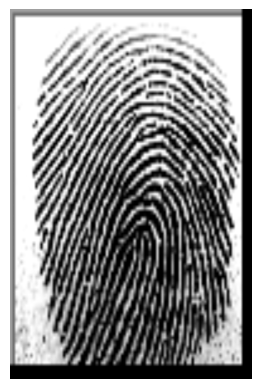

In [41]:
plt.imshow(images_resized[0], cmap='gray')
plt.axis('off')
plt.show()

In [43]:
#Inversion:
images_resized_inverted = []
for i, img in enumerate(images_resized[:100]):
    if img is not None:
        inverted_img = cv2.bitwise_not(img)
        images_resized_inverted.append(inverted_img)

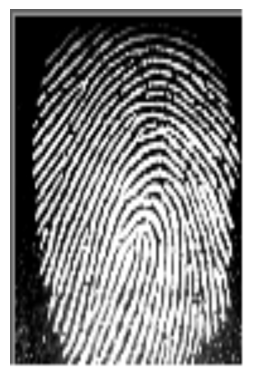

In [45]:
plt.imshow(images_resized_inverted[0], cmap='gray')
plt.axis('off')
plt.show()

In [47]:
#Translation & Rotation

images_translated = []
images_rotated = []
for img in images_resized_inverted[:100]:
    rows , cols = img.shape
    # Translation
    translation_matrix = np.float32([[1, 0, 50], [0, 1, 100]])  
    translated_img = cv2.warpAffine(img, translation_matrix, (cols,rows))
    images_translated.append(translated_img)
    # Rotation
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2 , rows / 2 ), 45, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols,rows))
    images_rotated.append(rotated_img)

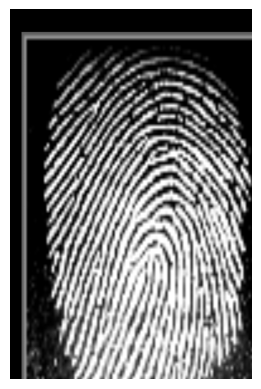

In [48]:
plt.imshow(images_translated[0], cmap='gray')
plt.axis('off')
plt.show()

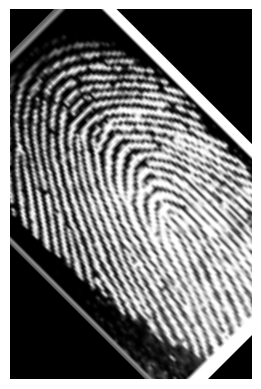

In [51]:
plt.imshow(images_rotated[0], cmap='gray')
plt.axis('off')
plt.show()

In [53]:
#Morphological Transformations of images

images_dilated = []
images_eroded = []

for img in images_resized_inverted[:100]:
    kernel = np.ones((9,9), np.uint8)
    dilated_img = cv2.dilate(img, kernel, iterations=1)
    images_dilated.append(dilated_img)
    
    eroded_img = cv2.erode(img, kernel, iterations=1)
    images_eroded.append(eroded_img)

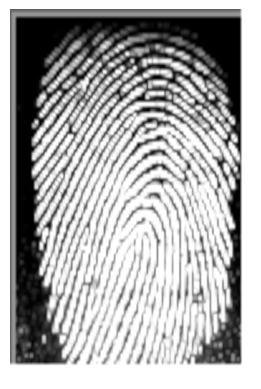

In [55]:
plt.imshow(images_dilated[0], cmap='gray')
plt.axis('off')
plt.show()

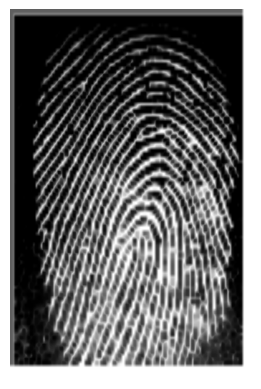

In [57]:
plt.imshow(images_eroded[0], cmap='gray')
plt.axis('off')
plt.show()

In [59]:
# Gaussian Filter 
images_gaussian_blurred = []

for img in images_resized_inverted[:100]:
    blurred_img = cv2.GaussianBlur(img, (15,15), 0)
    images_gaussian_blurred.append(blurred_img)

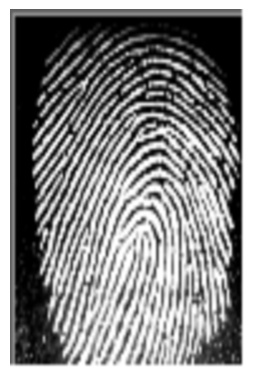

In [61]:
plt.imshow(images_gaussian_blurred[0], cmap='gray')
plt.axis('off')
plt.show()

In [63]:
# Median Filtering
images_median_filtered = []

for img in images_resized_inverted[:100]:
    median_img = cv2.medianBlur(img, 5)
    images_median_filtered.append(median_img)

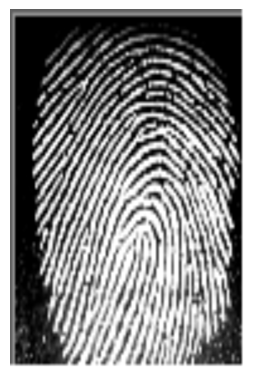

In [64]:
plt.imshow(images_median_filtered[0], cmap='gray')
plt.axis('off')
plt.show()

In [65]:
images_bilateral_filtered = []

for img in images_resized_inverted[:100]:
    filtered = cv2.bilateralFilter(img,9,75,75)
    images_bilateral_filtered.append(filtered)

In [68]:
#Edge Detection Using Laplacian Derivatives 
laplacian_edges = []

for img in images_resized_inverted[:100]:
    lap = cv2.Laplacian(img, cv2.CV_64F)
    lap = cv2.convertScaleAbs(lap)
    laplacian_edges.append(lap)

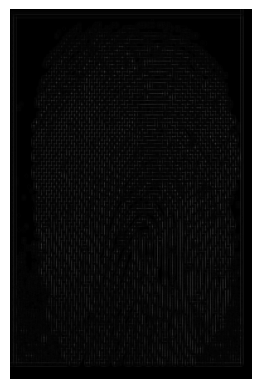

In [69]:
plt.imshow(laplacian_edges[0], cmap='gray')
plt.axis('off')
plt.show()

In [70]:
#Edge Detection Using Sobel Derivatives

sobel_combined_list = []

for img in images_resized_inverted[:100]:
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    combined = cv2.add(sobel_x,sobel_y)
    sobel_combined_list.append(combined)

In [71]:
# Edge Detection Using Canny 

canny_edges_list = []

for img in images_resized_inverted[:100]:
    edges = cv2.Canny(img, 100, 200)
    canny_edges_list.append(edges)

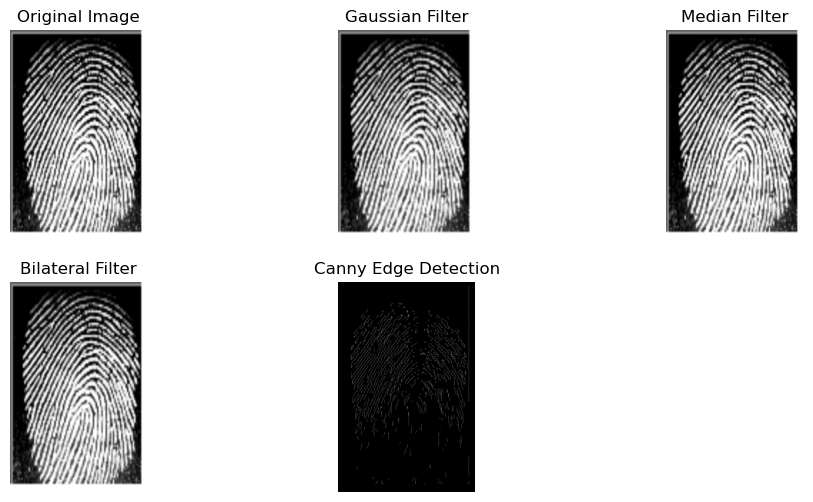

In [73]:
img = images_resized_inverted[0]  
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(images_gaussian_blurred[0], cmap='gray')  
plt.title('Gaussian Filter')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(images_median_filtered[0], cmap='gray')  
plt.title('Median Filter')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(images_bilateral_filtered[0], cmap='gray') 
plt.title('Bilateral Filter')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(canny_edges_list[0], cmap='gray')  
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

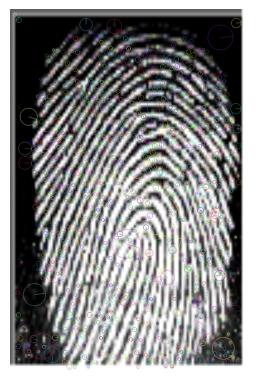

In [74]:
#SIFT algorithm
sift = cv2.SIFT_create()
sift_keypoints_images = []

for img in images_resized_inverted[:100]:
    keypoints, descriptors = sift.detectAndCompute(img, None)
    img_with_kp = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    sift_keypoints_images.append(img_with_kp)

plt.imshow(sift_keypoints_images[0], cmap='gray')
plt.axis('off')
plt.show()


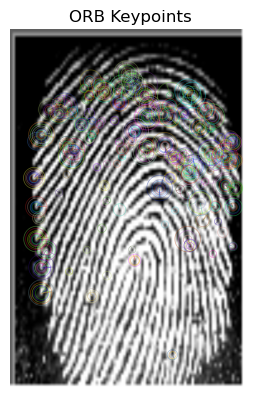

In [90]:
# Used ORB instead of SURF because SURF is a patented algorithm and not available in the default OpenCV installation.

orb = cv2.ORB_create()
orb_keypoints_images = []

for img in images_resized_inverted[:100]:  
    keypoints, descriptors = orb.detectAndCompute(img, None)
    img_with_kp = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    orb_keypoints_images.append(img_with_kp)

plt.imshow(orb_keypoints_images[0], cmap='gray')
plt.axis('off')
plt.title("ORB Keypoints")
plt.show()

In [92]:
# This code compares the first two fingerprint images using ORB feature detection and matching.
orb = cv2.ORB_create()
img1 = images_resized_inverted[0]
img2 = images_resized_inverted[1]

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)

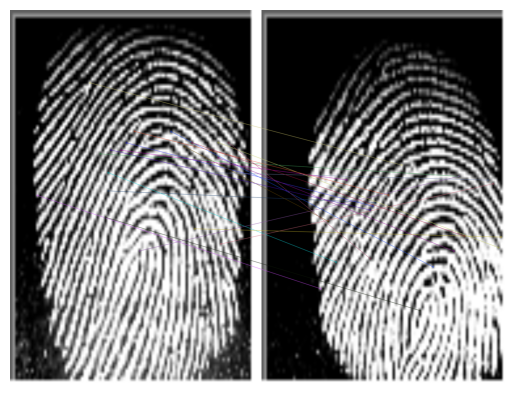

In [94]:
plt.figure(figsize=(10, 5))
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()

In [109]:
#FLANN Based Matcher

sift = cv2.SIFT_create()
img1 = images_resized_inverted[0]
img2 = images_resized_inverted[1]
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
good_matches = []
for m, n in matches:
    if m.distance < 0.85 * n.distance:
        good_matches.append(m)

result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

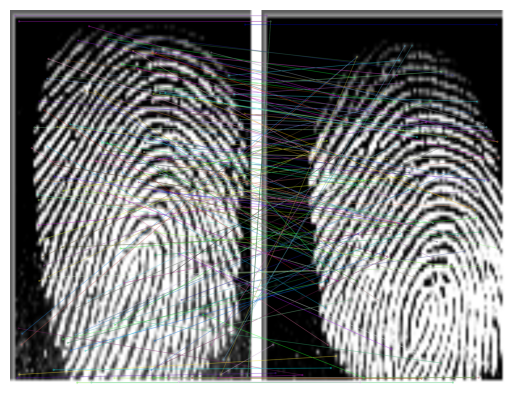

In [110]:
plt.figure(figsize=(10, 5))
plt.imshow(result)
plt.axis('off')
plt.show()